In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder,StandardScaler, PolynomialFeatures
from sklearn.model_selection import GridSearchCV
df=pd.read_csv("../Data/House_Rent_Dataset.csv")

In [24]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [26]:
df.drop_duplicates()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [27]:
df.isna().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [28]:
df['City'].unique()

array(['Kolkata', 'Mumbai', 'Bangalore', 'Delhi', 'Chennai', 'Hyderabad'],
      dtype=object)

In [29]:
df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [30]:
label_encoder=LabelEncoder()
for i in df.columns:
    df[i] = label_encoder.fit_transform(df[i])

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X= df.drop(['Rent'],axis=1)
y=df[['Rent']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_train=y_train.to_numpy().ravel()
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

print("Feature Importances:")
print(feature_importances)

C:\Users\prakh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Feature Importances:
Point of Contact     0.409738
Bathroom             0.154361
City                 0.133894
Size                 0.133711
BHK                  0.044220
Area Locality        0.039940
Floor                0.028195
Posted On            0.027696
Furnishing Status    0.016226
Tenant Preferred     0.007823
Area Type            0.004197
dtype: float64


In [32]:
df.corr()


,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
Posted On,1.000000,0.118987,0.226367,0.136699,-0.001316,-0.226989,0.004785,0.095874,-0.054728,-0.012807,0.161076,-0.300790
BHK,0.118987,1.000000,0.580550,0.753109,-0.005432,-0.153225,0.016211,0.046914,-0.140264,0.041534,0.798538,-0.230954
Rent,0.226367,0.580550,1.000000,0.529431,0.019187,-0.392622,-0.012145,0.366402,-0.284342,0.018470,0.677655,-0.640200
Size,0.136699,0.753109,0.529431,1.000000,-0.004615,-0.061654,-0.009826,-0.063040,-0.194108,0.042754,0.726304,-0.178412
Floor,-0.001316,-0.005432,0.019187,-0.004615,1.000000,-0.020014,-0.021142,0.098340,-0.014131,0.016247,-0.004437,-0.025098
Area Type,-0.226989,-0.153225,-0.392622,-0.061654,-0.020014,1.000000,-0.007743,-0.282856,0.056276,0.155388,-0.184173,0.559451
Area Locality,0.004785,0.016211,-0.012145,-0.009826,-0.021142,-0.007743,1.000000,-0.042836,0.015144,-0.030848,0.011104,0.000294
City,0.095874,0.046914,0.366402,-0.063040,0.098340,-0.282856,-0.042836,1.000000,0.002633,0.041769,0.108524,-0.357165
Furnishing Status,-0.054728,-0.140264,-0.284342,-0.194108,-0.014131,0.056276,0.015144,0.002633,1.000000,-0.092878,-0.182648,0.131276
Tenant Preferred,-0.012807,0.041534,0.018470,0.042754,0.016247,0.155388,-0.030848,0.041769,-0.092878,1.000000,0.057041,0.063182


In [33]:
df.drop(columns=['Floor','Area Locality','Tenant Preferred','Posted On','Area Type','Furnishing Status'],inplace=True)

In [34]:
null_values = df.isnull().sum()
print(null_values)

BHK                 0
Rent                0
Size                0
City                0
Bathroom            0
Point of Contact    0
dtype: int64


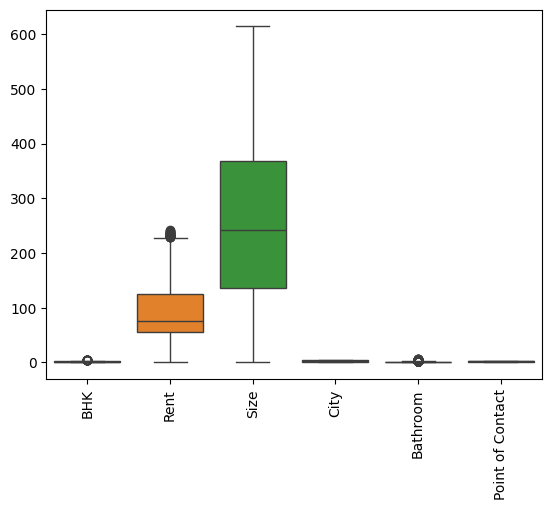

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()


In [36]:
X= df.drop(['Rent'],axis=1)
y=df[['Rent']]

APPLYING MODEL

USING LINEAR REGRESSION

In [37]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [38]:
y_pred = model.predict(X_test)
rmse = (root_mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae=(mean_absolute_error(y_test,y_pred))
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')


Root Mean Squared Error: 27.54702361737279
R-squared: 0.7302529920850762
Mean Absolute Error: 21.367712812574894


USING HYPERPARAMETR TUNING

In [39]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
degree = 3
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X_scaled)


In [40]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
degree = 3
poly = PolynomialFeatures(degree=degree)
model=LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
rmse = (root_mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae=(mean_absolute_error(y_test,y_pred))
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')
y_train=y_train.to_numpy().ravel()


Root Mean Squared Error: 22.954355501747365
R-squared: 0.8127001281522502
Mean Absolute Error: 17.441181640625


USING RANDOM FOREST

In [41]:
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [42]:
y_pred = rf.predict(X_test)
rmse = (root_mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae=(mean_absolute_error(y_test,y_pred))
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')

Root Mean Squared Error: 22.830925734099203
R-squared: 0.8147090038780934
Mean Absolute Error: 16.500100754814678


HYPERPARAMETER TUNING FOR RANDOM FOREST

In [43]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

random_forest_model = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20, 30]
}

grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters: ", best_params)
print("Best Score: ", best_score)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_train_scaled)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_train_scaled)

rmse = root_mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
mae = mean_absolute_error(y_train, y_pred)

print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")


Best Parameters:  {'max_depth': 10, 'n_estimators': 200}
Best Score:  -545.7565349299831
Root Mean Squared Error: 17.64257036741746
R-squared: 0.8923273302794676
Mean Absolute Error: 13.051423306745969
